# Decision tree  (from scruch)

In [148]:
class decision_tree:
    def __init__(self):
        self.tree = None
     
    def entropy(self ,S):
        n=S.shape[0]
        E=0
        # edentify the classes that we have 
        cls=np.unique(S[:,-1])
        for c in cls:
            # calculate the probability of each class 
            p=S[S[:,-1]==c].shape[0]/n
            E=E-p*np.log2(p) 
        return E 
    
    def Gain(self,S,idx,v):
        S1=S[S[:,idx]<=v]
        S2=S[S[:,idx]>v]
        # the nbr of exemple
        n=S.shape[0]
        w1=S1.shape[0]/n
        w2=S2.shape[0]/n
        E=self.entropy(S)
    
        E_left=self.entropy(S1) 
        E_right=self.entropy(S2)
        G=E - ( w1 * E_left + w2 * E_right )
        return G
    
    def best_split(self,S):
        n=S.shape[0]
        if self.entropy(S)==0 or n<2 : 
            return None, None, None, None
        d=S.shape[1]-1 # on suprime celle de y
        G=-np.inf
        idx=-1
        val=0
        for i in range(d):
            vls=np.unique(S[:,i])
            for v in vls:
                nG=self.Gain(S,i,v)
                if(nG>G):
                    G=nG
                    idx=i
                    val=v
        return  S[S[:,idx]<=val], S[S[:,idx]>val],idx, val
    
    def create_tree(self ,S,L=3):    
        S_l, S_r, idx,valeur=self.best_split(S)
        if idx != None:
            self.tree = {
                "best_index":idx,
                "best_value":valeur,
                "entropy":self.entropy(S),
                "left_S": self.create_tree(S_l,L-1),
                "right_S":self.create_tree(S_r,L-1),
                }
            return self.tree
        else:
            # Return a leaf node with the majority class
            if S.shape[0] > 0:
                cls, counts = np.unique(S[:, -1], return_counts=True)
                majority_class = cls[np.argmax(counts)]
                return majority_class
#                 return S
            else:
                return None
        
    # training the model with spesific data
    def fit(self , S ):
        self.tree = self.create_tree(S)
        return self.tree
    
    # predict ...
    def predict(self, x, tree):
        if not isinstance(tree, dict):
            return tree
        best_idx = tree['best_index']
        best_value = tree['best_value']
        if x[best_idx] <= best_value:
            return self.predict(x,tree["left_S"])
        else:
            return self.predict(x,tree["right_S"])

In [149]:
import numpy as np

In [279]:
S=np.array([
  [5,8,7,12,0],
  [8,7,10,15,1],
  [12,10,17,17,2],
  [17,14,18,9,2],
  [10,17,16,9,2],
  [12.5,17,16,9,2],
  [5,6,12,10,0],
  [1,8,12,15,0],
  [3,10,16,16,1],
  [16,8,13,8,2],
  [14,9,16,9,2]]).astype("float32")

d = decision_tree()

In [280]:
tree = d.fit(S)
tree

{'best_index': 0,
 'best_value': 8.0,
 'entropy': 1.4353713907745331,
 'left_S': {'best_index': 3,
  'best_value': 12.0,
  'entropy': 0.9709505944546686,
  'left_S': 0.0,
  'right_S': {'best_index': 0,
   'best_value': 1.0,
   'entropy': 0.9182958340544896,
   'left_S': 0.0,
   'right_S': 1.0}},
 'right_S': 2.0}

In [281]:
d.predict([8,7,10,15], tree)

1.0

# Decision Tree ( SKlearn ) 

In [158]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
S=np.array([
  [5,8,7,12,0],
  [8,7,10,15,1],
  [12,10,17,17,2],
  [17,14,18,9,2],
  [10,17,16,9,2],
  [12.5,17,16,9,2],
  [5,6,12,10,0],
  [1,8,12,15,0],
  [3,10,16,16,1],
  [16,8,13,8,2],
  [14,9,16,9,2]]).astype("float32")

In [162]:
model = DecisionTreeClassifier()
model.fit(S[:,:-1] , S[:,-1])

# overfiting --
model.score(S[:,:-1] , S[:,-1])

1.0

In [163]:
model.predict([[8,7,10,15]])

array([1.], dtype=float32)

## Other Methode 

In [160]:
from sklearn import tree

In [164]:
S=np.array([
  [5,8,7,12,0],
  [8,7,10,15,1],
  [12,10,17,17,2],
  [17,14,18,9,2],
  [10,17,16,9,2],
  [12.5,17,16,9,2],
  [5,6,12,10,0],
  [1,8,12,15,0],
  [3,10,16,16,1],
  [16,8,13,8,2],
  [14,9,16,9,2]]).astype("float32")

[Text(0.6, 0.875, 'x[0] <= 9.0\nentropy = 1.435\nsamples = 11\nvalue = [3, 2, 6]'),
 Text(0.4, 0.625, 'x[3] <= 13.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2, 0]'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.6, 0.375, 'x[0] <= 2.0\nentropy = 0.918\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 6]')]

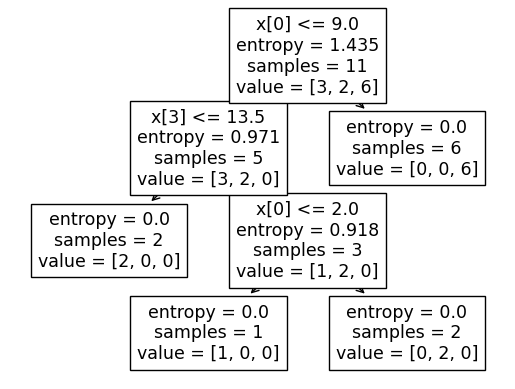

In [176]:
model1 = tree.DecisionTreeClassifier(criterion="entropy" ,  max_depth=3)
model1 = model1.fit(S[:,:-1] , S[:,-1])
tree.plot_tree(model1)

# Titanic Dataset

In [269]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [270]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [271]:
# df.info()

In [272]:
new_data = df.loc[:,["Age" , "Sex","SibSp","Pclass","Fare","Survived"]]
new_data["Sex"].replace({"male":0,"female":1} , inplace=True)
new_data

,Age,Sex,SibSp,Pclass,Fare,Survived
0,22.0,0,1,3,7.2500,0
1,38.0,1,1,1,71.2833,1
2,26.0,1,0,3,7.9250,1
3,35.0,1,1,1,53.1000,1
4,35.0,0,0,3,8.0500,0
...,...,...,...,...,...,...
886,27.0,0,0,2,13.0000,0
887,19.0,1,0,1,30.0000,1
888,NaN,1,1,3,23.4500,0
889,26.0,0,0,1,30.0000,1


In [273]:
new_data.corr()

,Age,Sex,SibSp,Pclass,Fare,Survived
Age,1.000000,-0.093254,-0.308247,-0.369226,0.096067,-0.077221
Sex,-0.093254,1.000000,0.114631,-0.131900,0.182333,0.543351
SibSp,-0.308247,0.114631,1.000000,0.083081,0.159651,-0.035322
Pclass,-0.369226,-0.131900,0.083081,1.000000,-0.549500,-0.338481
Fare,0.096067,0.182333,0.159651,-0.549500,1.000000,0.257307
Survived,-0.077221,0.543351,-0.035322,-0.338481,0.257307,1.000000


In [278]:
model = DecisionTreeClassifier()
x_train , x_test , y_train , y_test = train_test_split(new_data.iloc[:,:-1] , new_data.iloc[:,-1] , test_size=0.20 , random_state=42 )

model.fit(x_train , y_train)
print(model.score(x_test , y_test))
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test , y_pred)
accuracy

0.8156424581005587


0.8156424581005587